In [3]:
import numpy as np

from lamp import *
from lamp.utils.usps import *

In [4]:
datax,datay = load_usps("../data/USPS_train.txt")
testx,testy = load_usps("../data/USPS_test.txt")

## Non-Linear

In [7]:
neg, pos = 6, 9
data69x,data69y = get_usps([neg,pos],datax,datay)
test69x,test69y = get_usps([neg,pos],testx,testy)
data69y = np.where(data69y == pos, 1, -1).reshape(-1, 1)
test69y = np.where(test69y == pos, 1, -1).reshape(-1, 1)

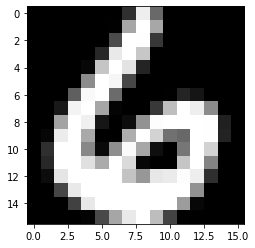

In [10]:
show_usps(data69x[0])

In [4]:
batch_size, input_size = data69x.shape
hidden_size = 128

In [5]:
model = [Linear(input_size, hidden_size), Tanh(), Linear(hidden_size, 1), Sigmoid()]
mse = MSELoss()

In [6]:
input = data69x
inputs = []
for module in model:
    input = module.forward(input)
    inputs.append(input)

input

array([[0.99972389],
       [0.99994071],
       [0.99999387],
       ...,
       [0.99999521],
       [0.99999848],
       [0.99999946]])

In [7]:
loss = mse.forward(data69y, input)
loss

array([[9.99447848e-01],
       [9.99881415e-01],
       [9.99987731e-01],
       ...,
       [2.29348430e-11],
       [2.30409625e-12],
       [2.92839387e-13]])

In [8]:
delta = mse.backward(data69y, loss)
deltas = []

for idx in range(len(model)-1, 0, -1):
    delta = model[idx].backward_delta(inputs[idx-1], delta)
    deltas.append(delta)

delta

array([[ 2.53917703e-06,  1.12171051e-15, -4.78386205e-07, ...,
        -4.01849411e-14, -2.06214993e-09, -8.37071316e-05],
       [ 8.09082839e-07,  4.75584104e-11, -1.91907762e-08, ...,
        -1.54511445e-14, -5.52794139e-10, -1.98066987e-05],
       [ 1.59323189e-08,  5.91440201e-16, -3.97756683e-14, ...,
        -5.15568717e-17, -9.42878945e-15, -4.01396151e-06],
       ...,
       [-2.17650650e-13, -8.17169307e-18,  6.89102505e-09, ...,
         7.57951734e-19,  5.79156543e-12,  4.72402256e-06],
       [-4.76279049e-07, -4.09842841e-14,  8.30864137e-09, ...,
         1.32229998e-13,  4.16749665e-13,  6.44815075e-09],
       [-2.78868794e-11, -1.90031557e-20,  1.33617200e-09, ...,
         5.14547578e-17,  1.52715319e-22,  1.40576060e-07]])

In [9]:
for module in model:
    module.update_parameters()
    module.zero_grad()

## Multi-Class

In [5]:
batch_size, input_size = datax.shape
output_size = 10
hidden_size = 128

In [6]:
net = Sequential(
    Linear(input_size, hidden_size), Tanh(), Linear(hidden_size, output_size), Sigmoid()
)
loss = CELoss()
optimizer = Optimizer(net, loss)


In [7]:
yhat, loss = optimizer.step(datax, datay)
yhat

ValueError: operands could not be broadcast together with shapes (7291,) (7291,10) 

In [12]:
for _ in range(100):
    yhat, loss = optimizer.step(datax, datay)

yhat

array([[1.93386547e-07],
       [3.89942977e-06],
       [1.51530367e-09],
       ...,
       [9.99940624e-01],
       [9.99994227e-01],
       [9.99999919e-01]])